Train dataset = Point de donnée étiqueté
Pool = Point de données non étiqueté

pandas — pour traiter les données
sklearn — pour le modèle SVM
numpy — pour la manipulation de matrices et de tableaux
matplotlib.pyplot — pour les graphiques
imageio — pour créer des GIF
os — pour créer des dossiers et vérifier leur contenu

In [19]:
from sklearn.svm import SVC, LinearSVC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import imageio as io
import os

origdata = pd.read_csv("Iris.csv") 
origdata[:10]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [20]:
k1, k2 = 'PetalLengthCm', 'PetalWidthCm'
data = origdata[[k1, k2, 'Species']].copy()
data[:10]

,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa
5,1.7,0.4,Iris-setosa
6,1.4,0.3,Iris-setosa
7,1.5,0.2,Iris-setosa
8,1.4,0.2,Iris-setosa
9,1.5,0.1,Iris-setosa


    Nous changeons les étiquettes en 0 (pour Iris-setosa), 1 (pour Iris-versicolor) et 2 (pour Iris-virginica).

In [21]:
X = data[[k1, k2]]
y = data['Species']
print('Classes:')
print(y.unique(), '\n\n\n')





Classes:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica'] 





In [22]:
y[y=='Iris-setosa'] = 0
y[y=='Iris-versicolor'] = 1
y[y=='Iris-virginica'] = 2
print(y.unique())

[0 1 2]


C:\Users\KONDO-~1\AppData\Local\Temp/ipykernel_14224/2559895113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y=='Iris-setosa'] = 0
C:\Users\KONDO-~1\AppData\Local\Temp/ipykernel_14224/2559895113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y=='Iris-versicolor'] = 1
C:\Users\KONDO-~1\AppData\Local\Temp/ipykernel_14224/2559895113.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y=='Iris-virginica'] = 2


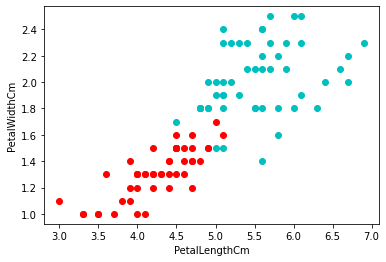

In [23]:
plt.figure()
setosa = y == 0
versicolor = y == 1
virginica = y == 2

plt.scatter(X[k1][versicolor], X[k2][versicolor], c='r')
plt.scatter(X[k1][virginica], X[k2][virginica], c='c')
plt.xlabel(k1)
plt.ylabel(k2)
plt.show()

In [24]:
X1 = X[y != 0] 
y1 = y[y != 0] 
X1[:5]

,PetalLengthCm,PetalWidthCm
50,4.7,1.4
51,4.5,1.5
52,4.9,1.5
53,4.0,1.3
54,4.6,1.5


In [25]:
X1 = X1.reset_index(drop=True)
y1 = y1.reset_index(drop=True)
y1 -= 1
print(y1.unique())
X1[:5]

[0 1]


,PetalLengthCm,PetalWidthCm
0,4.7,1.4
1,4.5,1.5
2,4.9,1.5
3,4.0,1.3
4,4.6,1.5


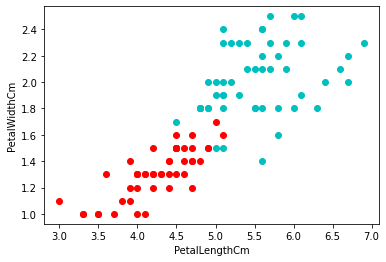

In [26]:
fig = plt.figure()

plt.scatter(X1[k1][y1==0], X1[k2][y1==0], c='r')
plt.scatter(X1[k1][y1==1], X1[k2][y1==1], c='c')

plt.xlabel(k1)
plt.ylabel(k2)
fig.savefig('main.jpg', dpi=100)
plt.show() 

Ont trace le SVM pour tout les données de notre dataset

In [27]:
y1 = y1.astype(dtype=np.uint8)
clf0 = LinearSVC()
clf0.fit(X1, y1)
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
print(clf0.coef_)
print(clf0.intercept_)

[[0.28015165 1.70096256]]
[-4.17110483]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


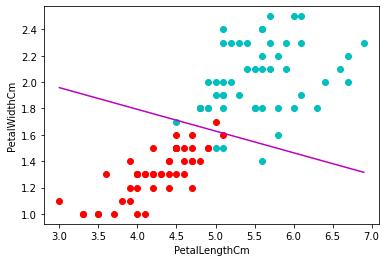

In [28]:
xmin, xmax = X1[k1].min(), X1[k1].max()
ymin, ymax = X1[k2].min(), X1[k2].max()
stepx = (xmax - xmin)/99
stepy = (ymax - ymin)/99
a0, b0, c0 = clf0.coef_[0, 0], clf0.coef_[0, 1], clf0.intercept_
# Formula for reference
# a*x + b*y + c = 0
# y = -(a*x + c)/b

lx0 = [xmin + stepx * i for i in range(100)]
ly0 = [-(a0*lx0[i] + c0)/b0 for i in range(100)]

plt.figure()

plt.scatter(X1[k1][y1==0], X1[k2][y1==0], c='r')
plt.scatter(X1[k1][y1==1], X1[k2][y1==1], c='c')

plt.plot(lx0, ly0, c='m')

plt.xlabel(k1)
plt.ylabel(k2)

plt.show()

In [29]:
X_pool, X_test, y_pool, y_test = train_test_split(X1, y1, test_size=0.2, random_state=1)
X_pool, X_test, y_pool, y_test = X_pool.reset_index(drop=True), X_test.reset_index(drop=True), y_pool.reset_index(drop=True), y_test.reset_index(drop=True)
# random state 1 5 iterations
# random state 2 20 iterations

In [30]:
clf0.decision_function(X_pool.iloc[6:8])

array([1.67816601, 0.1212898 ])

In [31]:
def find_most_ambiguous(clf, unknown_indexes):
    
    ind = np.argmin(np.abs( 
        list(clf0.decision_function(X_pool.iloc[unknown_indexes]) )
        ))
    return unknown_indexes[ind]

In [32]:
def plot_svm(clf, train_indexes, unknown_indexes, new_index = False, title = False, name = False):
    X_train = X_pool.iloc[train_indexes]
    y_train = y_pool.iloc[train_indexes]

    X_unk = X_pool.iloc[unknown_indexes]

    if new_index:
        X_new = X_pool.iloc[new_index]

    a, b, c = clf.coef_[0, 0], clf.coef_[0, 1], clf.intercept_
    # Straight Line Formula
    # a*x + b*y + c = 0
    # y = -(a*x + c)/b

    lx = [xmin + stepx * i for i in range(100)]
    ly = [-(a*lx[i] + c)/b for i in range(100)]

    fig = plt.figure(figsize=(9,6))

    # plt.scatter(x[k1][setosa], x[k2][setosa], c='r')
    plt.scatter(X_unk[k1], X_unk[k2], c='k', marker = '.')
    plt.scatter(X_train[k1][y_train==0], X_train[k2][y_train==0], c='r', marker = 'o')
    plt.scatter(X_train[k1][y_train==1], X_train[k2][y_train==1], c='c', marker = 'o')
    

    plt.plot(lx, ly, c='m')
    plt.plot(lx0, ly0, '--', c='g')

    if new_index:
        plt.scatter(X_new[k1], X_new[k2], c='y', marker="*", s=125)
        plt.scatter(X_new[k1], X_new[k2], c='y', marker="*", s=125)
        plt.scatter(X_new[k1], X_new[k2], c='y', marker="*", s=125)
        plt.scatter(X_new[k1], X_new[k2], c='y', marker="*", s=125)
        plt.scatter(X_new[k1], X_new[k2], c='y', marker="*", s=125)

    if title:
        plt.title(title)
    
    plt.xlabel(k1)
    plt.ylabel(k2)

    if name:
        fig.set_size_inches((9,6))
        plt.savefig(name, dpi=100)

    plt.show()

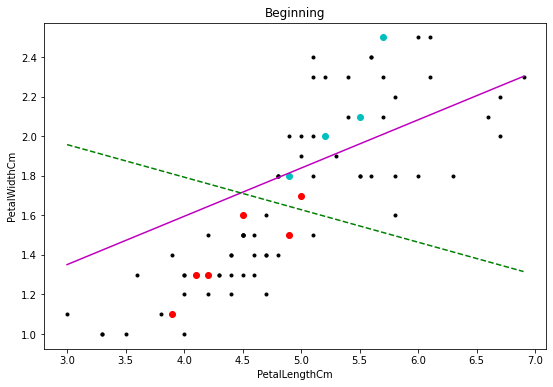

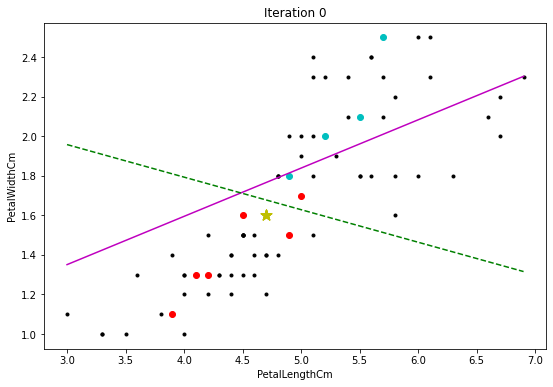

In [33]:
train_indexes = list(range(10))
unknown_indexes = list(range(10, 80))
X_train = X_pool.iloc[train_indexes]
y_train = y_pool.iloc[train_indexes]
clf = LinearSVC()
clf.fit(X_train, y_train)

# folder = "rs1it5/"
folder = "rs2it20/"
# folder = "rs1it20/"

try:
    os.mkdir(folder)
except:
    pass

filenames = ["ActiveLearningTitleSlide2.jpg"] * 2

title = "Beginning"
# name = folder + ("rs1it5_0a.jpg")
name = folder + ("rs2it20_0a.jpg")
plot_svm(clf, train_indexes, unknown_indexes, False, title, name)

filenames.append(name)

n = find_most_ambiguous(clf, unknown_indexes)
unknown_indexes.remove(n)

title = "Iteration 0"
name = folder + ("rs1it5_0b.jpg")
# name = folder + ("rs2it20_0b.jpg")
filenames.append(name)
plot_svm(clf, train_indexes, unknown_indexes, n, title, name)

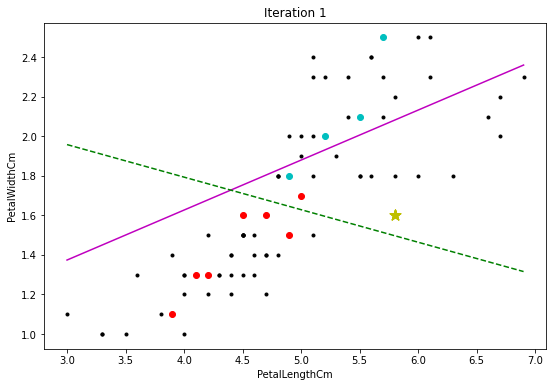

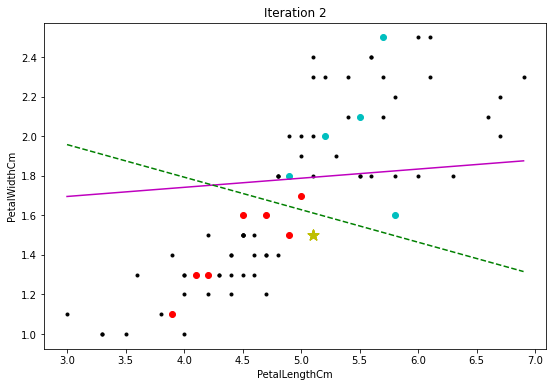

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


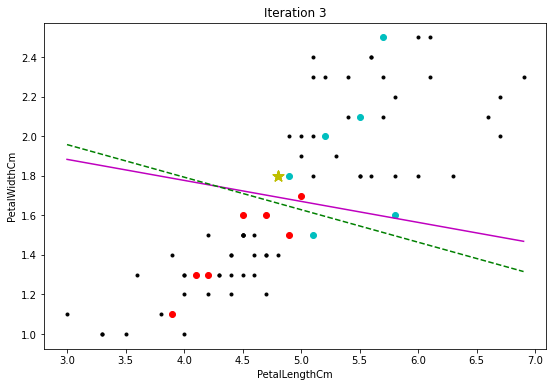

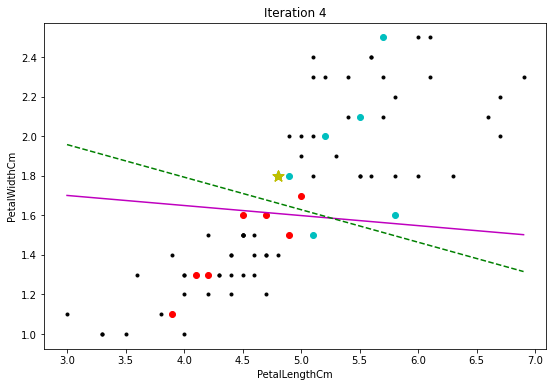

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


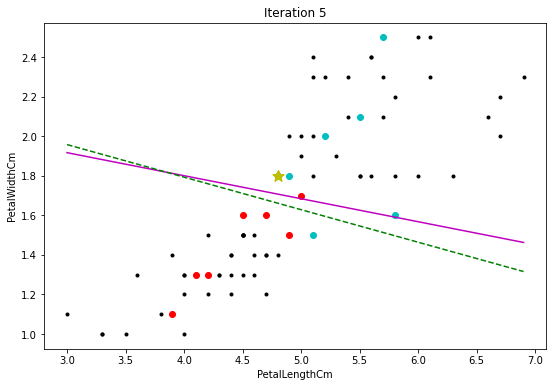

In [34]:
num = 5
# num = 20
t = []
for i in range(num):
    
    train_indexes.append(n)
    X_train = X_pool.iloc[train_indexes]
    y_train = y_pool.iloc[train_indexes]
    clf = LinearSVC()
    clf.fit(X_train, y_train)
    title, name = "Iteration "+str(i+1), folder + ("rs1it5_%d.jpg" % (i+1))
    # title, name = "Iteration "+str(i+1), folder + ("rs2it20_%d.jpg" % (i+1))

    n = find_most_ambiguous(clf, unknown_indexes)
    unknown_indexes.remove(n)
    plot_svm(clf, train_indexes, unknown_indexes, n, title, name)
    filenames.append(name)

In [36]:
images = []
for filename in filenames:
    images.append(io.imread(filename))
io.mimsave('./rs2it20/rs1it5.gif', images, duration = 1)
# io.mimsave('rs2it20.gif', images, duration = 1)
# io.mimsave('rs1it20.gif', images, duration = 1)
try:
    os.mkdir('./rs2it20/rs1it5')
#    os.mkdir('rt2it20')
except:
    pass
os.listdir('./rs2it20/rs1it5')

FileNotFoundError: No such file: 'C:\Users\KONDO-TECH\Documents\jupyter\ActiveLearningTitleSlide2.jpg'